In [6]:
def generateRSA(p,q,ebits):
    n = p*q
    phi = (p-1)*(q-1)
    e = next_prime(2**(ebits-1))
    if gcd(e,phi) == 1:
        d = pow(e,-1,phi)
    return (n,e,d)

def testApproximationT(msbs,p,q,ebits):
    n,e,d = generateRSA(p,q,ebits)
    k = (e*d-1)//((p-1)*(q-1))
    dm = d >> (int(d).bit_length() - msbs)
    d0 = dm << (int(d).bit_length() - msbs)
    k_ = (e * d0 - 1) // (p*q)
    delta_k = abs(k - k_)
    return k, k_, delta_k


In [7]:
q2=8409994693249896404784904531467076591669926559983707531327683517189185536127617166572882422715355263943409904919761519989515813520595114890263313096406517
p2=13332483168606238737181696873100104751420317885066608062141583458038224144727215840015557177200814570451949655836044414422384438369627145548625958519764109

p1=12625904132876024391053747255529472882205295003498735138849760876178996107401873371263341157195294988792537890500933341025075865608380995322266553378244827
q1=11309138517753609601189729920172165631612370294087077281755734175142319827761966692830479699631439962525444124861722707903014820730766996645318082582620491

p3=11771189496077447472415256585690278237732856915764247194903035840506904720003320569381951682128930227151469309640903353145013377646752106391473373652877601
q3=8414767089133873769468945032224272902543617028236776621774998465708268113915905912210782246217830296553177303208167413016742103206604903812714839551204589
true_values = []
computed_values = []
for ebit_length in [4,6,7]:
    k, k_, delta_k = testApproximationT(ebit_length, p1, q1, ebit_length)
    true_values.append(k)
    computed_values.append(k_)
    k, k_, delta_k = testApproximationT(ebit_length, p2, q2, ebit_length)
    true_values.append(k)
    computed_values.append(k_)
    k, k_, delta_k = testApproximationT(ebit_length, p3, q3, ebit_length)
    true_values.append(k)
    computed_values.append(k_)

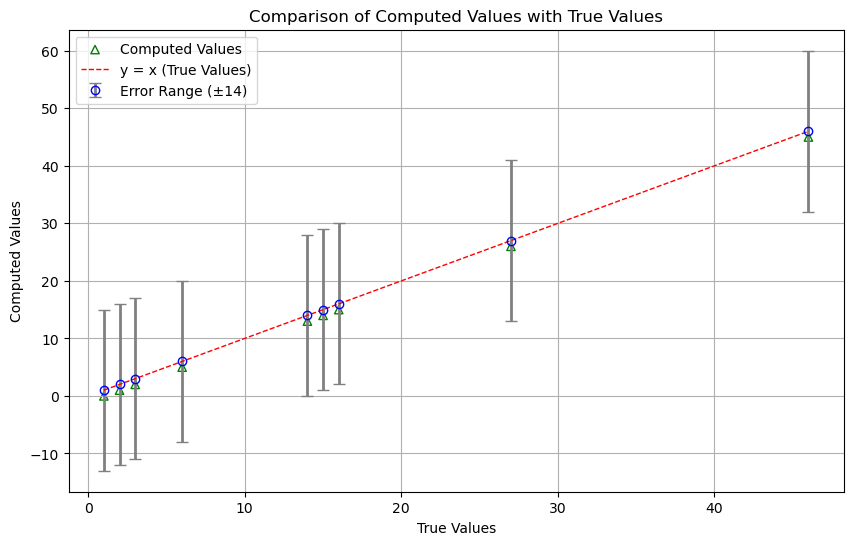

In [9]:
import matplotlib.pyplot as plt

# Error margin
error_margin = 14

# Create scatter plot
plt.figure(figsize=(10, 6))

# Plot computed values with hollow green circles
plt.scatter(true_values, computed_values, edgecolor='green', facecolor='none', marker='^', label='Computed Values')

# Add error bars with hollow blue circles
plt.errorbar(true_values, true_values, yerr=error_margin, fmt='o', markerfacecolor='none', color='blue', ecolor='gray', elinewidth=2, capsize=4, label='Error Range (±14)')

# Plot y=x reference line
plt.plot([min(true_values), max(true_values)], [min(true_values), max(true_values)], color='red', linestyle='--', linewidth=1, label='y = x (True Values)')

# Set chart title and labels
plt.title('Comparison of Computed Values with True Values')
plt.xlabel('True Values')
plt.ylabel('Computed Values')
plt.legend()

# Show grid and plot
plt.grid(True)
#plt.savefig('comparison_plot.pdf', format='pdf')
plt.show()
